In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
df = pd.read_csv('/content/airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [5]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df['LogPassengers'] = np.log(df['Passengers'])

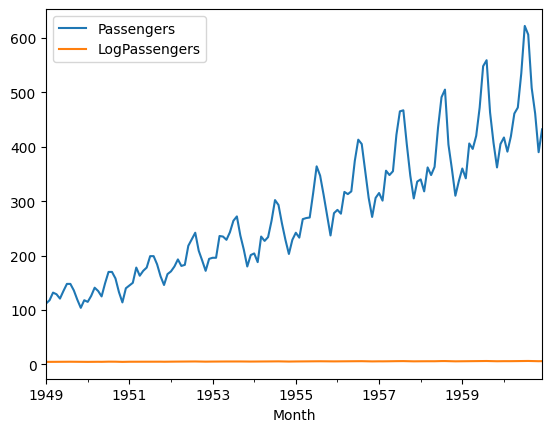

In [7]:
df.plot();

In [8]:
Ntest = 12
train = df.iloc[:-Ntest].copy().dropna()
test = df.iloc[-Ntest:].copy().dropna()

In [9]:
series = df['LogPassengers'].to_numpy()

X = []
Y = []
T = 10

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(x)
print(f'X.shape : {X.shape}, Y.shape : {Y.shape}')

X.shape : (134, 10), Y.shape : (134,)


In [10]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [11]:
l_model = LinearRegression()
l_model.fit(Xtrain, Ytrain)

LinearRegression()

In [12]:
l_model.score(Xtrain, Ytrain)

0.9599443783339897

In [13]:
l_model.score(Xtest, Ytest)

0.6910953044565584

In [14]:
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

In [15]:
train_idx[:T] = False

In [16]:
df.loc[train_idx, 'LR train'] = l_model.predict(Xtrain)
df.loc[test_idx, 'LR test'] = l_model.predict(Xtest)

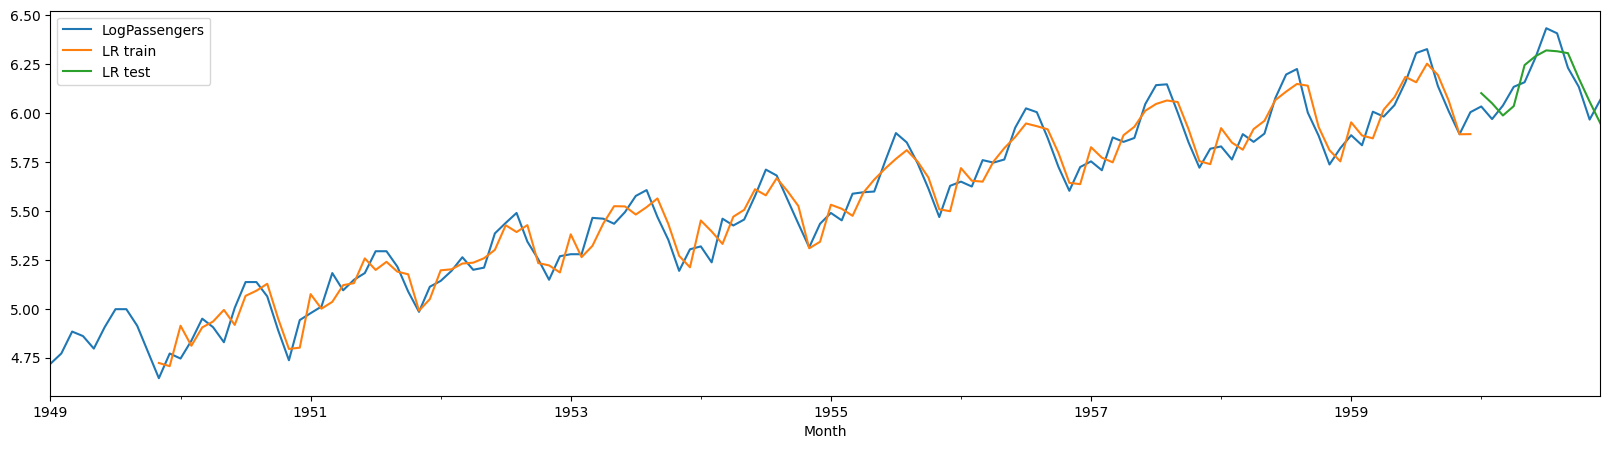

In [17]:
df[['LogPassengers', 'LR train', 'LR test']].plot(figsize = (20,5));

In [18]:
multistep_forecast = []

last_x = Xtest[0]


while len(multistep_forecast) < Ntest:
  p = l_model.predict(last_x.reshape(1, -1))[0]

  multistep_forecast.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [19]:
df.loc[test_idx, 'LR multistep'] = multistep_forecast

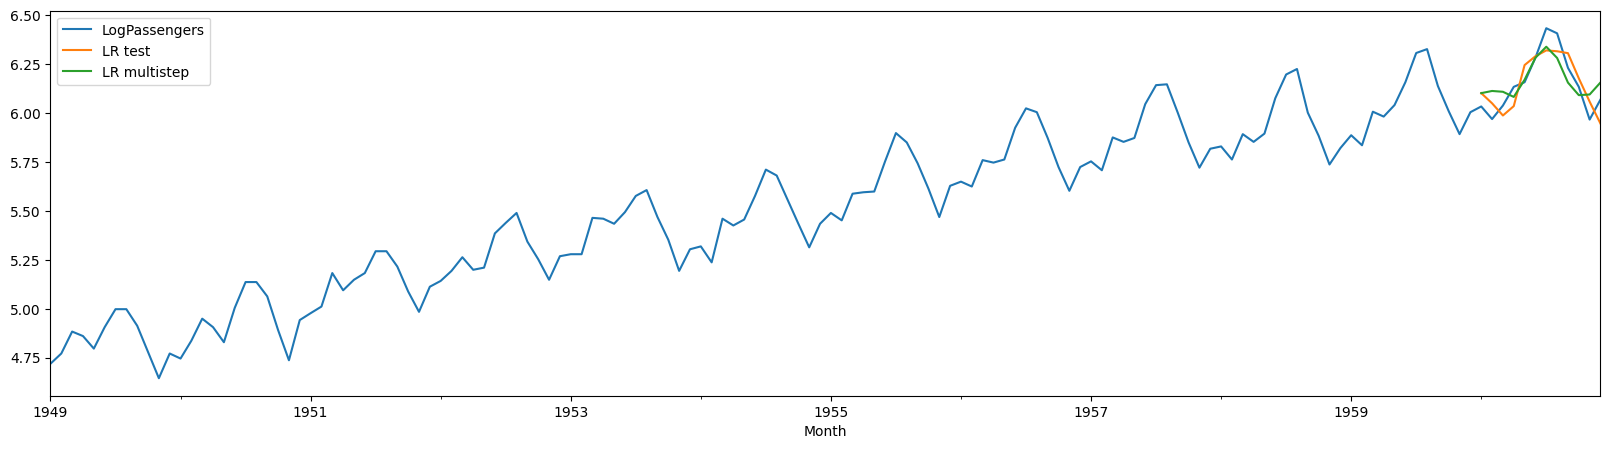

In [20]:
df[['LogPassengers', 'LR test', 'LR multistep']].plot(figsize = (20, 5));

In [ ]:
Tx = T
Ty = Ntest
X = []
Y = []


for t in range(len(series)-Tx-Ty+1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(Y)



X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)

print(f'X.shape : {X.shape}, Y.shape : {Y.shape}')

In [ ]:
Xtrain_m, Ytrain_m = X[:-Ntest], Y[:-Ntest]
Xtest_m, Ytest_m = X[-Ntest:], Y[-Ntest:]

In [ ]:
l_model = LinearRegression()
l_model.fit(Xtrain_m, Ytrain_m)
l_model.score(Xtrain_m, Ytrain_m)

In [ ]:
l_model.score(Xtest_m, Ytest_m)

In [ ]:
r2_score(l_model.predit(Xtest_m).flatten(), Ytest_m.flatten())

In [ ]:
df.loc[test_idx, 'LR multioutput'] = l_model.predict(Xtest_m).flatten()

In [ ]:
cols = ['LogPasengers', 'LR multistep', 'LR test', 'LR multioutput']
df[cols].plot(figsize = (20,5));